# SET-4

# Q1.Provide Drop Down with options for Logical AND, and Logical XOR of an image to the user  and perform the operations according to the choice of user on the following images. Also  Deploy the same on Heruko and provide the URL. 

In [18]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

import random
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
#import matplotlib.image as mpimg 
#from matplotlib.pyplot import imshow
#%matplotlib inline

In [2]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 6.5MB/s 
     |████████████████████████████████| 112kB 47.3MB/s 
     |████████████████████████████████| 174kB 25.7MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 4.2MB 34.9MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 122kB 48.6MB/s 
     |████████████████████████████████| 788kB 40.6MB/s 
     |████████████████████████████████| 368kB 35.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=4a7eecbb6eb159d27e8059572812ca350efd111a9e37be35dbf9d086fe11f0ef
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipyke

In [3]:
!pip install pyngrok

     |████████████████████████████████| 747kB 5.6MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=12107bb038ef75b2807c3e0f75abe401557099ef21a32f03abd6a13528c74c7f
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [4]:
!ngrok authtoken 1sO8VjMd7JuRjhyolG3kzPT2jZT_ZqPnyoqHxbwFu2oNKpZm

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Operated Image:


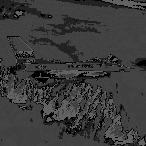

In [44]:
url = "/content/img.png"
img1=cv.imread(url,1)
img2=np.ones(img1.shape, dtype="uint8")*100
#cv2_imshow(img1)
#cv2_imshow(img2)
#@title Logical Operations on Images {run:"auto"} 
Operation = 'LOGICAL AND' #@param ["LOGICAL AND", "LOGICAL XOR"] {allow-input: true}
if Operation=='LOGICAL AND':
 bitwise = cv.bitwise_and(img1,img2)
if Operation=='LOGICAL XOR':
 bitwise = cv.bitwise_xor(img1,img2)
print('Operated Image:')


cv2_imshow(bitwise)


Operated Image:


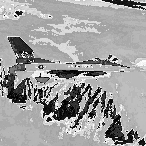

In [45]:
url = "/content/img.png"
img1=cv.imread(url,1)
img2=np.ones(img1.shape, dtype="uint8")*100
#cv2_imshow(img1)
#cv2_imshow(img2)
#@title Logical Operations on Images {run:"auto"} 
Operation = 'LOGICAL XOR' #@param ["LOGICAL AND", "LOGICAL XOR"] {allow-input: true}
if Operation=='LOGICAL AND':
 bitwise = cv.bitwise_and(img1,img2)
if Operation=='LOGICAL XOR':
 bitwise = cv.bitwise_xor(img1,img2)
print('Operated Image:')


cv2_imshow(bitwise)

In [38]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
from keras.models import load_model

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Digital Image Processing lab</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Collor Palette
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))
R = st.slider('R', min_value=0, max_value=255, step=1)
G = st.slider('G', min_value=0, max_value=255, step=1)
B = st.slider('B', min_value=0, max_value=255, step=1)

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  #img = image.load_img(image_data, target_size=(224, 224))
  #image = image.img_to_array(img)
  #img_reshap= np.expand_dims(image, axis=0)
  #img_reshap = preprocess_input(img_reshap)
   
  image_data[:] = [R,G,B]
  st.image(image_data, use_column_width=True)
  return 0
if file is None:
  st.text("Please upload an Image file")
else:
  file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  image = cv2.imdecode(file_bytes, 1)
  st.image(file,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Change Color"):
  result=import_and_predict(image)
  
if st.button("About"):
  st.header(" Alka Rani")
  st.subheader("Assistant Professor, Department of Computer Engineering")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Digital Image processing Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [39]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [40]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://b2c4586f10b9.ngrok.io" -> "http://localhost:80">

In [43]:
 !streamlit run --server.port 80 app.py

2021-07-05 10:56:32.711890: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.225.7.30:80

  Stopping...
  Stopping...
^C


#  Q2. Apply appropriate mask on the below image to sharpen the image.  



[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]
<class 'numpy.ndarray'>


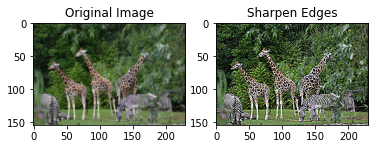

In [19]:
def main():
    img = cv2.imread("/content/giraffe.png", 1)
   
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    k1 = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]), np.float32)
    
    print(k1)
    print(type(k1))

    output = cv2.filter2D(img, -1, k1)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title('Sharpen Edges')
    
    plt.show()

if __name__ == "__main__":
    main()